# Prices of Agricultural goods in USA

In this project we will be analyzing data about the prices of the various raw-materials in USA and draw inferences from the data. The dataset has index of prices of Cotton Price, Hard log Price, Hard sawnwood Price, Hide Price, Plywood Price, Rubber Price, Soft log Price, Soft sawnwood Price and Wood pulp Price over the period of 1990 to 2020. The set is downloaded from Kaggle.com, where it was uploaded by Micheal Scott.

We are using Pandas and Seaborn libraries of Python, along with the other necessary libraries to supplement them. It is a Exploratory Data Analysis (EDA) project.

<img src="https://static.dw.com/image/19055844_1006.jpg"/>

In [1]:
!pip install jovian opendatasets --upgrade --quiet

## Downloading the dataset

Let's begin by downloading the data, and listing the files within the dataset.

In [94]:
dataset_url = 'https://www.kaggle.com/datasets/kianwee/agricultural-raw-material-prices-19902020' 

In [95]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./agricultural-raw-material-prices-19902020" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './agricultural-raw-material-prices-19902020'

In [96]:
import os
os.listdir(data_dir)

['agricultural_raw_material.csv']

In [97]:
project_name = "agricultural-goods-price-in-usa"

## Data Preparation and Cleaning

Here we will remove null values, change values to their pertinent datatypes and explore the data.



In [98]:
import pandas as pd
import numpy as np
import datetime as decision_tree

In [99]:
ag_prices_df = pd.read_csv(data_dir + '/agricultural_raw_material.csv')

#### Checking for null values

In [100]:
ag_prices_df.isna().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

#### Dropping null values

In [101]:
ag_prices_df.shape

(361, 25)

In [102]:
ag_prices_df.dropna(inplace=True)

In [103]:
ag_prices_df.isna().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [104]:
ag_prices_df.shape

(327, 25)

The number of rows in the data have decreased from 361 to 327. As the loss in data is manageable, we will continue to work on this data without making further adjustments.

#### Taking the relevant columns 

In [105]:
ag_prices_df = ag_prices_df[["Month", "Cotton Price", "Hard log Price", "Hard sawnwood Price", "Hide Price", "Plywood Price", "Rubber Price", "Softlog Price", "Soft sawnwood Price", "Wood pulp Price"]]

In [106]:
ag_prices_df

,Month,Cotton Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
0,Apr-90,1.83,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29
1,May-90,1.89,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51
2,Jun-90,1.99,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35
3,Jul-90,2.01,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83
4,Aug-90,1.79,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74
...,...,...,...,...,...,...,...,...,...,...
322,Feb-17,1.88,263.45,680.49,76.58,483.23,2.71,157.58,287.43,875.00
323,Mar-17,1.91,263.48,672.48,77.93,483.27,2.35,160.05,300.42,875.00
324,Apr-17,1.92,270.34,688.44,75.43,495.87,2.21,159.84,306.60,875.00
325,May-17,1.95,265.28,704.52,69.36,486.59,2.10,159.84,306.60,875.00


#### Overviewing the data

In [107]:
ag_prices_df.describe()

,Cotton Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,1.621376,248.984343,707.950367,78.566667,509.422691,1.660765,164.527462,291.061713,678.674373
std,0.532764,68.621751,144.563241,13.690623,93.685312,1.067676,25.596308,34.113959,158.292658
min,0.820000,133.280000,413.370000,28.590000,312.360000,0.490000,119.350000,183.610000,384.000000
25%,1.275000,194.695000,573.470000,69.495000,434.055000,0.840000,145.970000,277.590000,544.705000
50%,1.540000,247.320000,728.710000,77.250000,512.340000,1.330000,160.370000,294.960000,662.540000
75%,1.830000,286.970000,831.635000,86.000000,581.690000,2.155000,180.210000,310.865000,832.170000
max,5.060000,520.810000,973.600000,114.630000,751.810000,6.260000,259.970000,372.600000,966.490000


#### Converting the date and time in the dataset to proper format 

In [109]:
ag_prices_df["Month"] = pd.to_datetime(ag_prices_df.Month, format="%b-%target")

#### Exploring the data

In [110]:
ag_prices_df.corr()

,Cotton Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
Cotton Price,1.000000,0.472239,0.485762,0.278639,0.315407,0.741314,-0.076004,-0.112985,0.562201
Hard log Price,0.472239,1.000000,0.814034,0.090494,0.826811,0.617128,0.243079,0.189408,0.353122
Hard sawnwood Price,0.485762,0.814034,1.000000,0.109112,0.790051,0.733093,0.167808,0.391009,0.581756
Hide Price,0.278639,0.090494,0.109112,1.000000,-0.076093,0.013567,0.242573,-0.113747,0.223542
Plywood Price,0.315407,0.826811,0.790051,-0.076093,1.000000,0.580699,0.345939,0.469934,0.320295
Rubber Price,0.741314,0.617128,0.733093,0.013567,0.580699,1.000000,-0.201970,0.179026,0.666412
Softlog Price,-0.076004,0.243079,0.167808,0.242573,0.345939,-0.201970,1.000000,0.418347,-0.211937
Soft sawnwood Price,-0.112985,0.189408,0.391009,-0.113747,0.469934,0.179026,0.418347,1.000000,0.152711
Wood pulp Price,0.562201,0.353122,0.581756,0.223542,0.320295,0.666412,-0.211937,0.152711,1.000000


## Exploratory Analysis and Visualization

Now we will further explore the data and derive implications from it



#### Importing relevant libraries and setting apt parameters for plots and graphs 


In [111]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (18, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Plotting multiple items to get an bird-eye view of the prices

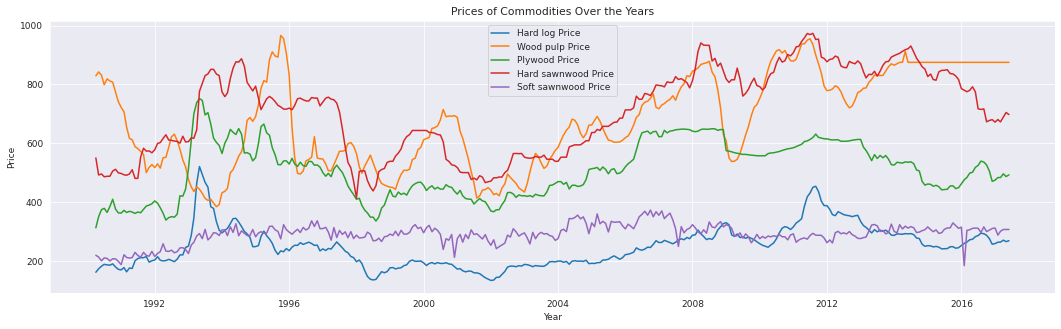

In [112]:
sns.lineplot(y="Hard log Price", x="Month", data=ag_prices_df, label="Hard log Price")sns.lineplot(y="Wood pulp Price", x="Month", data=ag_prices_df, label="Wood pulp Price")sns.lineplot(y="Plywood Price", x="Month", data=ag_prices_df, label="Plywood Price")sns.lineplot(y="Hard sawnwood Price", x="Month", data=ag_prices_df, label="Hard sawnwood Price")sns.lineplot(y="Soft sawnwood Price", x="Month", data=ag_prices_df, label="Soft sawnwood Price").set(title="Prices of Commodities Over the Years", ylabel="Price", xlabel="Year")plt.legend();

Using this graph we get to see the price of the commodities thorugh the years. The 2000s Dot-Com bubble burst and 2008 sub-prime crises are clearly visible in the plot, in the form of dips in the price. Price of Soft Sanwood has only minor changes. Wood pulp and Ploywood have very high deviations.

#### Plotting hide price to see for any patterns in the data

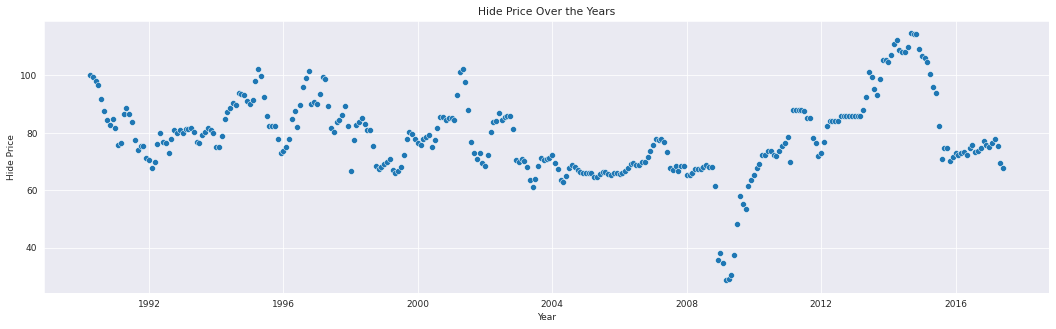

In [119]:
sns.scatterplot(y="Hide Price", x="Month", data=ag_prices_df).set(title="Hide Price Over the Years", xlabel="Year", ylabel="Hide Price");

Hide price is very volatile. The lowest point can be seen in 2009, potentially due to the 2008 Sub-prime Mortgage Crisis, and the highest point is in 2014-15.

#### Exploring the price of cotton over the years

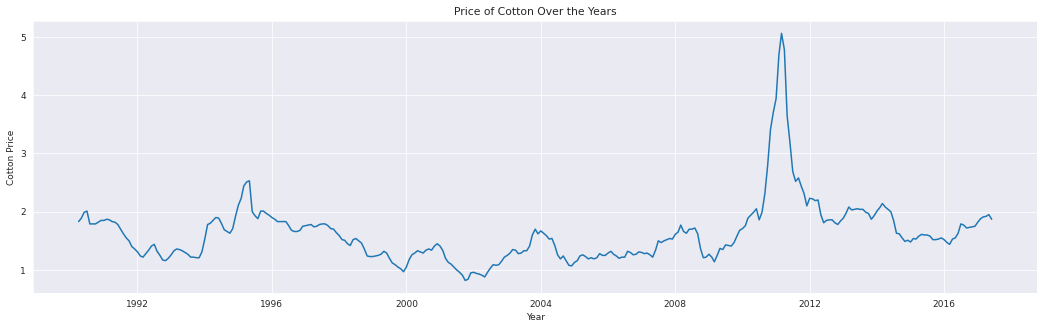

In [121]:
sns.lineplot(y="Cotton Price", x="Month" , data=ag_prices_df).set(title="Price of Cotton Over the Years", xlabel="Year", ylabel="Cotton Price");

In this graph we plot the cotton price over the last 2 decades. Although the price of cotton has been stable for majority of the time but we see two clear spikes in 1994-95 and 2011-12

#### Exploring Hardlog Price 

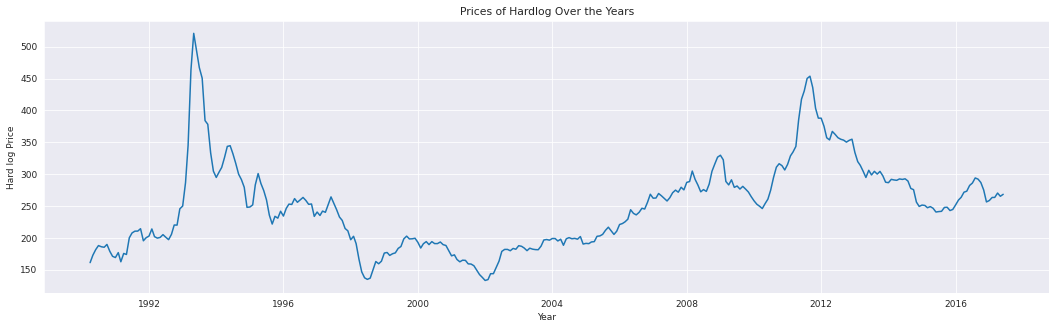

In [122]:
sns.lineplot(y="Hard log Price", x="Month", data=ag_prices_df).set(title="Prices of Hardlog Over the Years", xlabel="Year");

The price of hardlog dips in 1998-1999, and 2002-03. The highest point achieved are in 1993-94 and 2011.
In general the price has been increasing over the years.
The price shows a high volatility.

## Asking and Answering Questions

Now we will try to answer some specific questions using the data. We will also research and find factors not included in this data that might affect our dataset.



#### Q1: A risk-averse company wants to invest in a venture. Which among the following would be the most appropriate venture for it?

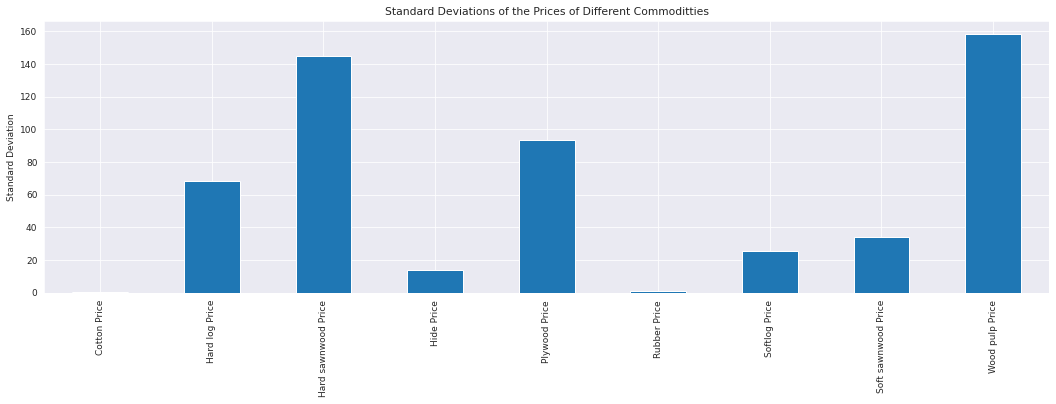

In [123]:
ag_prices_df.std(numeric_only=True).plot.bar(ylabel="Standard Deviation").set(title="Standard Deviations of the Prices of Different Commoditties");

Over the years the price of cotton has been the most stable. Therefore, it would be most preferable for the company to invest in a cotton venture as it would help them in minimizing the risk.

#### Q2: What caused the spike in cotton price in 1994-95 and 2011-12?

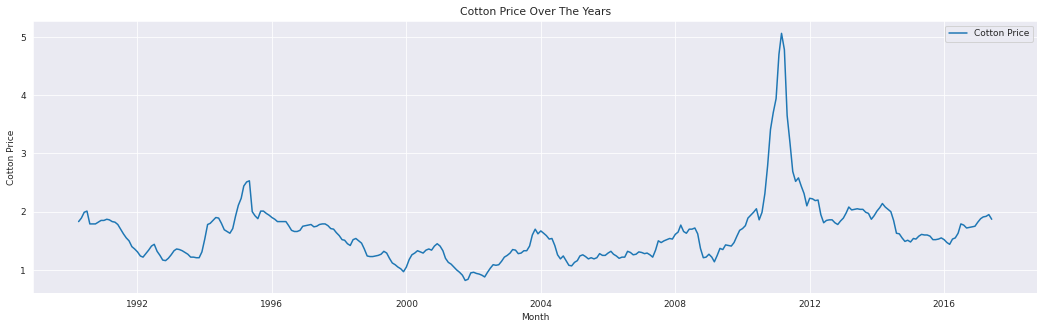

In [124]:
sns.lineplot(y="Cotton Price", x="Month", data=ag_prices_df, label="Cotton Price").set(title="Cotton Price Over The Years");

We can find the answe to this problem in a document which was prepared by the US Government in defence of it's Cotton Program from Brzilian allegations.
"China’s imports averaged about 3.5 million bales per year for the 1994/95 through 1996/97 seasons, triple the level of the early 1990’s"¹
By the above setence we can infer that the increase in prices was mainly due to the tripling of demand of cotton bayles by China.

The price increase of 2012 can be attributed to the increased demand by China, floods in  cotton producing areas of Pakistan and speculative buying on international commodity exchanges.²

¹ source: "https://www.cotton.org/issues/2005/upload/WorldCottonMarket.pdf", on page 3 under the heading "1994/95 through 1996/97"

² source: "https://www.theguardian.com/business/2011/feb/17/cotton-price-surges" 
    

#### Q3: What caused the price to drop in Woodpulp in 1995 and 2009?

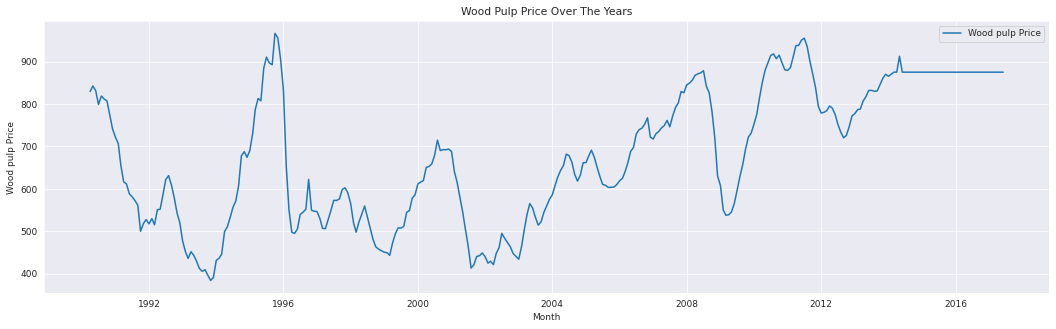

In [125]:
sns.lineplot(y="Wood pulp Price", x="Month", data=ag_prices_df, label="Wood pulp Price").set(title="Wood Pulp Price Over The Years");

A drop in demand of paper in China caused excess inventories in USA which caused the price to fall 


Sources:

https://www.ft.com/content/1138a6d8-2bec-11e1-98bc-00144feabdc0

https://www.nytimes.com/1996/04/01/business/wood-pulp-prices-off-40-since-autumn.html

#### Q4: Which commodity has had the highest price over the years?

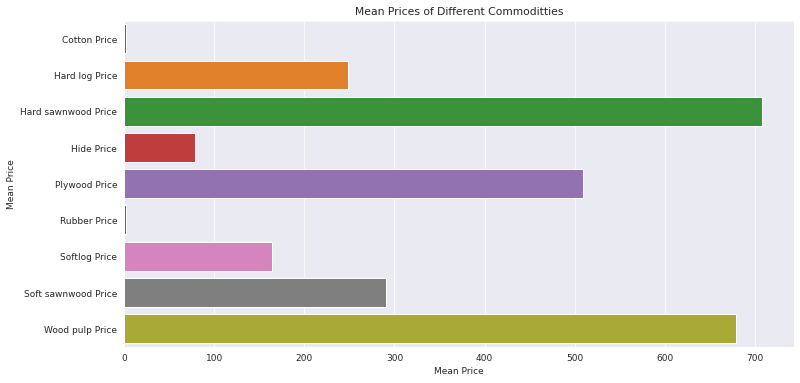

In [91]:
#ag_prices_df.mean(numeric_only=True).plot.bar(ylabel="Mean Price").set(title="Mean Prices of Different Commoditties")
plt.figure(figsize=(12,6))
plt.title('Mean Prices of Different Commoditties')
sns.barplot(target =  ag_prices_df.columns, x = ag_prices_df.mean())
sns.color_palette("BuPu_r")
plt.xlabel('Mean Price')
plt.ylabel('Mean Price');

Hard Sawnwood and Wood Pulp have the highest mean price, followed by Plywood and Soft Sawnwood.

Mean Values of 1) Hard Sawnwood = 707.95
               2) Wood Pulp = 678.67

In [57]:
#mean prices of the commodities in the period 1990-2020

ag_prices_df.mean()

Cotton Price             1.621376
Hard log Price         248.984343
Hard sawnwood Price    707.950367
Hide Price              78.566667
Plywood Price          509.422691
Rubber Price             1.660765
Softlog Price          164.527462
Soft sawnwood Price    291.061713
Wood pulp Price        678.674373
dtype: float64

In [56]:
#maximum price of the commodities in the period 1990-2020

ag_prices_df.max()

Cotton Price             5.06
Hard log Price         520.81
Hard sawnwood Price    973.60
Hide Price             114.63
Plywood Price          751.81
Rubber Price             6.26
Softlog Price          259.97
Soft sawnwood Price    372.60
Wood pulp Price        966.49
dtype: float64

#### Q5: Is the price of plywood dependent on the price of other woods?

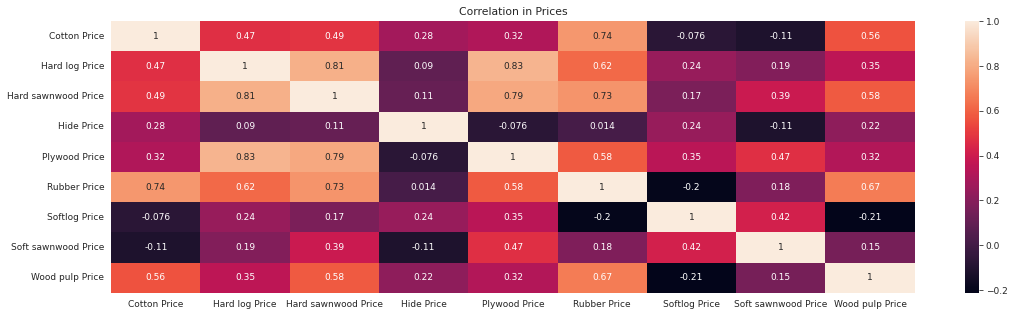

In [126]:
#fig = ag_prices_df.corr().style.background_gradient(cmap ='inferno').set_properties(**{'font-size': '20px'})
#fig.set_title("")
sns.heatmap(ag_prices_df.corr(), annot=True).set_title("Correlation in Prices");

The price of plywood has a high degree of co-relation to the price of Hard log and Hard Sanwood, which can show a dependence in price. 

## Inferences and Conclusion

Using the data we can see that the prices of all agricultural commodities roughly follow the macroeconomic conditions, despite the various factors that are individual to the prices of the commodities.
The commodities have negligible co-relation with each other (except for plywood) and have moreover stable price over the years with a slight steady increase.

The price of cotton has been very stable which shows the perennial demand of cotton unaffected by economic downturns or market booms. The price of rubber is stable as well which can be associated to the high number of uses which rubber has.

Hardlog, Hard Sanwood, Plywood and Softwood price changes to a great extent which is potentially the result of  them being used in items whose consumption can be postponed like construction, furniture, laying of railway tracks etc.

The high deviations in the price of Wood Pulp can be because of the high competition in the market for products it is sold for, like napkins, notebooks, toilet paper, paper-cups etc. A simple price war, economic downturn, increased imports could result in the companies reducing the price of their products and have a downward force on the prices of raw material used, i.e. wood pulp. 

Despite this all, there has been an overall increase in the price of all the commodities. 

## References and Future Work

In this project I extensively used Wikipedia, Financial Times and New York Times. The data set downloaded from kaggle.com made this project possible.

https://www.cotton.org/issues/2005/upload/WorldCottonMarket.pdf

https://www.theguardian.com/business/2011/feb/17/cotton-price-surges

https://www.kaggle.com/datasets/kianwee/agricultural-raw-material-prices-19902020

https://www.imf.org/en/News/Articles/2015/09/28/04/53/sores123009a

https://www.intereconomics.eu/contents/year/2006/number/3/article/raw-material-prices-at-new-record-highs.html

https://en.wikipedia.org/wiki/Global_recession

https://en.wikipedia.org/wiki/Great_Recession

https://en.wikipedia.org/wiki/Great_Recession

https://en.wikipedia.org/wiki/2000s_energy_crisis

https://en.wikipedia.org/wiki/Cotton_Price_Stabilization_Board





In future I would work on the following projects:
1) Predicting the future price of the commodities using Macine Learning.
    
2) Plotting the prices along with other micro and macro economic indicators like GDP, standard of living, Imports and Exports to further understand the role of these factors on the prices of the commodities